In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Authentication with twitter API
consumerKey = 'wJfTjhAhS1F2eac84zBl0VgZ0'
consumerSecret = 'IuQLvzWrk1fgetrRO9xTKLwZp1JaL4KpmYcaPtbmPJkEMTIfXc'

accessToken = '1459989746-mGMuvbiltJalHzwzaGPXhf37lTlXnlb1H217ij1'
accessTokenSecret = 'LCRnyj4Cuwr5BSgJA6zlCuKAc5IA8TMHl4HKdheUdMp06'

In [3]:
# Create the authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit= True)

In [4]:
posts = api.user_timeline(screen_name = "BillGates", count=100, lang="en", tweet_mode="extended")

i = 1
# Print the last 5 tweets
for tweet in posts[0:5]:
    print(str(i) + '. ' + tweet.full_text + '\n')
    i = i + 1

1. RT @BarackObama: Not many of us get to live to see our own legacy play out in such a meaningful, remarkable way. John Lewis did:

https://t…

2. This is a great loss for America, and for everyone who believes in making the world a more just place. John Lewis not only saw that our country could be better--he never stopped working to make it that way. We need leaders like him more than ever. https://t.co/YffaikZtZZ

3. RT @melindagates: Decision-makers can take steps right now to make sure the world recovers from this pandemic stronger, more prepared &amp; mor…

4. Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. @BernardOlayo founded @Hewa_Tele to address this often-overlooked challenge. https://t.co/TSea0oyDjP

5. This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients a

In [5]:
# Create a dataframe 
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

df.head()

,Tweets
0,RT @BarackObama: Not many of us get to live to...
1,"This is a great loss for America, and for ever..."
2,RT @melindagates: Decision-makers can take ste...
3,"Globally, a lack of medical oxygen–needed to t..."
4,This hero is playing a critical role in Kenya’...


In [6]:
#Clean the text 

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9:]+', '', text) 
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text


df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show
df

,Tweets
0,Not many of us get to live to see our own lega...
1,"This is a great loss for America, and for ever..."
2,Decision-makers can take steps right now to ma...
3,"Globally, a lack of medical oxygen–needed to t..."
4,This hero is playing a critical role in Kenya’...
...,...
95,I had a fascinating conversation with Vaclav S...
96,It's great to see Microsoft's leadership in th...
97,These global health heroes have helped Banglad...
98,It’s encouraging to see these results. Typhoid...


In [7]:
# Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Not many of us get to live to see our own lega...,0.625000,0.289394
1,"This is a great loss for America, and for ever...",0.687500,0.450000
2,Decision-makers can take steps right now to ma...,0.641534,0.428571
3,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
4,This hero is playing a critical role in Kenya’...,0.540000,0.020000
...,...,...,...
95,I had a fascinating conversation with Vaclav S...,0.675000,0.200000
96,It's great to see Microsoft's leadership in th...,0.583333,-0.066667
97,These global health heroes have helped Banglad...,0.187500,-0.062500
98,It’s encouraging to see these results. Typhoid...,0.733333,-0.100000


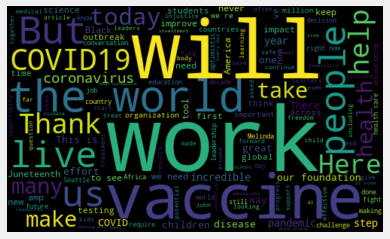

In [8]:
allWords = ' '.join( [ twts for twts in df['Tweets']])

wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)


df

,Tweets,Subjectivity,Polarity,Analysis
0,Not many of us get to live to see our own lega...,0.625000,0.289394,Positive
1,"This is a great loss for America, and for ever...",0.687500,0.450000,Positive
2,Decision-makers can take steps right now to ma...,0.641534,0.428571,Positive
3,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667,Negative
4,This hero is playing a critical role in Kenya’...,0.540000,0.020000,Positive
...,...,...,...,...
95,I had a fascinating conversation with Vaclav S...,0.675000,0.200000,Positive
96,It's great to see Microsoft's leadership in th...,0.583333,-0.066667,Negative
97,These global health heroes have helped Banglad...,0.187500,-0.062500,Negative
98,It’s encouraging to see these results. Typhoid...,0.733333,-0.100000,Negative


In [10]:
# print all positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(j) + '. ' + sortedDF['Tweets'][i])
        print()
        j = j+1

1. Not many of us get to live to see our own legacy play out in such a meaningful, remarkable way. John Lewis did:



2. This is a great loss for America, and for everyone who believes in making the world a more just place. John Lewis not only saw that our country could be better--he never stopped working to make it that way. We need leaders like him more than ever. 

3. Decision-makers can take steps right now to make sure the world recovers from this pandemic stronger, more prepared &amp; mor…

4. This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients alive. 

5. Happy Juneteenth fam! My latest for the . Find joy today! The images from the article alone are giving me l…

6. Proud to share my thoughts in ’s “injustice issue” on (and for) our beloved young people I call the TrayvonGene…

7. Opal is 93 years old and a great interview. Take a listen 

8. I am commit

In [11]:
# print all negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j) + '. ' + sortedDF['Tweets'][i])
        print()
        j = j+1

1. Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

2. “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

3. “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

4. Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

5. _Nyongo: 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

6. …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

7. The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are shining

<module 'matplotlib.pyplot' from 'C:\\Users\\shiva\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

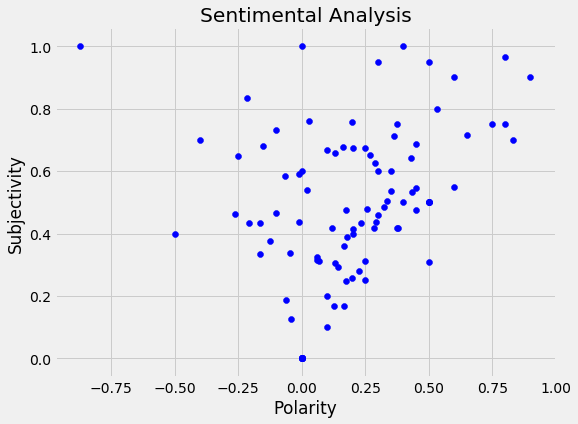

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt

In [19]:
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['Tweets']

positive = round( (ptweets.shape[0] / df.shape[0])*100, 2)

In [22]:
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets['Tweets']

negative = round( (ntweets.shape[0] / df.shape[0])*100, 2)

In [23]:
netweets = df[df.Analysis == "Neutral"]
netweets = netweets['Tweets']

neutral = round( (netweets.shape[0] / df.shape[0])*100, 2)

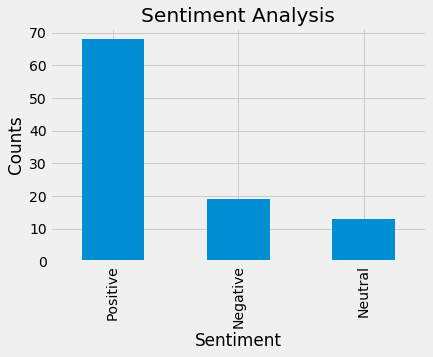

In [18]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

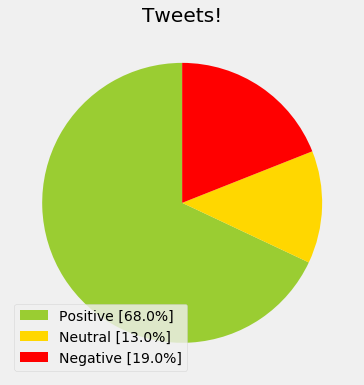

In [26]:
# Plotting the plots using pyplot
plt.figure(figsize=(8,6))
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]', 'Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc='best')
plt.title("Tweets!")
plt.show()